# Fake News Detector

## Installing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import sklearn.linear_model as sk

## Loading the data

In [2]:
data_fake=pd.read_csv('/Users/bidishamondal/Desktop/Projects/Fake-New-Analyser-Predictor/datasets/FakeNewsData.csv')
data_true=pd.read_csv('/Users/bidishamondal/Desktop/Projects/Fake-New-Analyser-Predictor/datasets/TrueNewsData.csv')

### Data Preview 

In [3]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
data_true.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [5]:
data_fake.loc[:, 'class'] = 0
data_true.loc[:, 'class'] = 1

In [6]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

In [7]:
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480,23470,-1):
    data_fake.drop([i],axis = 0, inplace = True)

    
data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i],axis = 0, inplace = True)
    
    

In [8]:
data_fake.shape, data_true.shape

((23471, 5), (21407, 5))

In [9]:
data_fake['target'] = 'fake'
data_true['target'] = 'true'

In [10]:
data_fake_manual_testing.loc[:, 'class'] = 0
data_true_manual_testing.loc[:, 'class'] = 1

In [11]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [12]:
data_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [13]:
data_merge = pd.concat([data_fake, data_true], axis = 0)
data_merge.head(10)

,title,text,subject,date,class,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,fake
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0,fake
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0,fake
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0,fake
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0,fake
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0,fake


#### "title",  "subject" and "date" columns is not required for detecting the fake news, so I am going to drop the columns.

In [14]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class', 'target'], dtype='object')

subject
Government News     1570
Middle-east          768
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10135
Name: text, dtype: int64


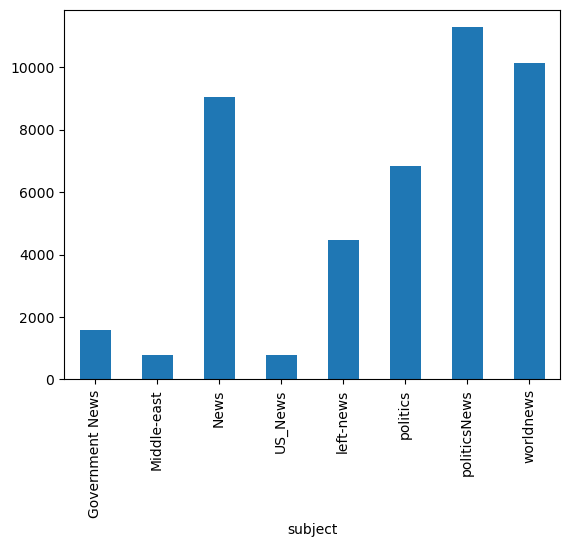

In [15]:
# Visualise distribution of data sources

print(data_merge.groupby(['subject'])['text'].count())
data_merge.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

In [16]:
data = data_merge.drop(['title','subject','date'], axis = 1)

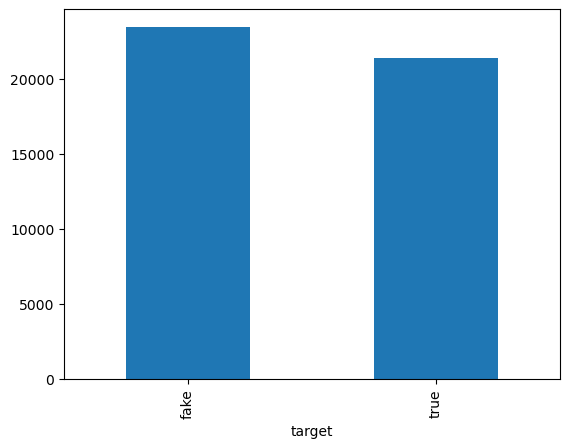

In [17]:
#count of missing values
data.isnull().sum() 

# Visualise the distribution of fake vs real articles
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

#### Randomly shuffling the dataframe 

In [18]:
data = data.sample(frac = 1)

In [19]:
data.head()

,text,class,target
18494,DUBAI (Reuters) - Five Bahraini policemen were...,1,true
5991,WASHINGTON (Reuters) - The Environmental Prote...,1,true
4724,"If there s one thing strong, successful women ...",0,fake
19362,"VARNSDORF, Czech Republic (Reuters) - The Czec...",1,true
7963,A disgusting black sludge is coming out of res...,0,fake


In [20]:
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)

In [21]:
data.columns

Index(['text', 'class', 'target'], dtype='object')

In [22]:
data.head()

,text,class,target
0,DUBAI (Reuters) - Five Bahraini policemen were...,1,true
1,WASHINGTON (Reuters) - The Environmental Prote...,1,true
2,"If there s one thing strong, successful women ...",0,fake
3,"VARNSDORF, Czech Republic (Reuters) - The Czec...",1,true
4,A disgusting black sludge is coming out of res...,0,fake


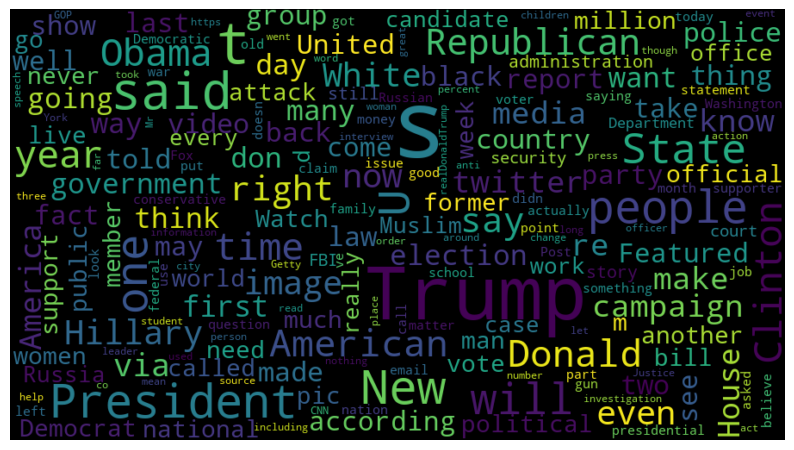

In [23]:
# Wordcloud for fake news data

from wordcloud import WordCloud

fake_news_data = data[data["target"] == "fake"]
words = ' '.join([text for text in fake_news_data.text])
wordcloud = WordCloud(width= 900, height= 500, max_font_size = 110, collocations = False).generate(words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

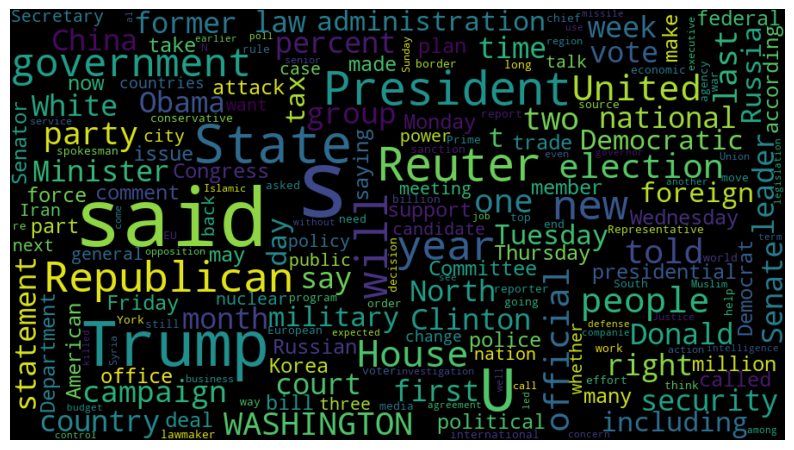

In [24]:
# Wordcloud for real news data

from wordcloud import WordCloud

real_news_data = data[data["target"] == "true"]
words = ' '.join([text for text in real_news_data.text])
wordcloud = WordCloud(width= 900, height= 500, max_font_size = 110, collocations = False).generate(words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Preprocessing Text

#### Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [25]:
def preprocess_textual_data(text):
    # conversion to lowercase
    text = text.lower()
    # removing tweet handles
    text = re.sub(r'@[A-Za-z0-9_]+|[^A-Za-z0-9 ]+', '', text)
    text = re.sub('\[.*?\]','',text)
    text = re.sub("\\W"," ",text)
    # removing hyperlinks
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+',b'',text)
    # removing punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text

In [26]:
data['text'] = data['text'].apply(preprocess_textual_data)

#### Defining dependent and independent variable as x and y

In [27]:
x = data['text']
y = data['class']

In [28]:
# Function to plot the confusion matrix 
# Reference code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

from sklearn import metrics
import itertools

model_perf_dict = dict()

def generate_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Confusion Matrix - with Normalization")
    else:
        print('Confusion Matrix - without Normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Training the model

#### Splitting the dataset into training set and testing set. 

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

### Extracting Features from the Text

#### Convert text to vectors

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
LogisticRegression = LogisticRegression()
LogisticRegression.fit(xv_train, y_train)

LogisticRegression()

In [33]:
pred_lr = LogisticRegression.predict(xv_test)

Confusion Matrix - without Normalization


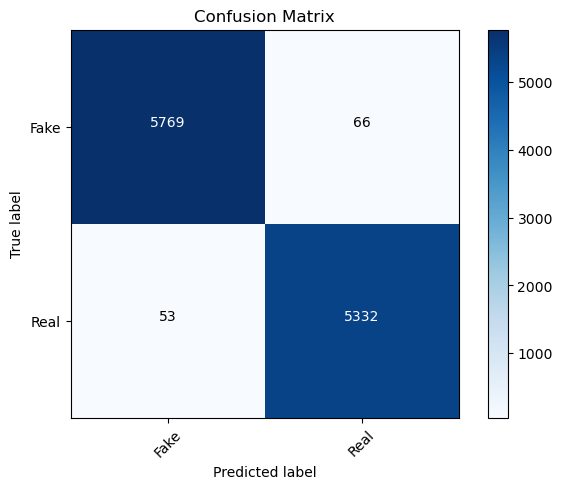

In [34]:
# Confusion Matrix for Logistic Regression

confusion_matrix = metrics.confusion_matrix(y_test, pred_lr)
generate_confusion_matrix(confusion_matrix, classes=['Fake', 'Real'])

In [35]:
model_perf_dict['Logistic Regression'] = round(accuracy_score(y_test, pred_lr) * 100, 2)

In [36]:
LogisticRegression.score(xv_test, y_test)

0.9893939393939394

In [37]:
print (classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5835
           1       0.99      0.99      0.99      5385

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [38]:
## Naive Bayes Classifier

In [39]:
from sklearn.naive_bayes import MultinomialNB

NaiveBayes = MultinomialNB()
NaiveBayes.fit(xv_train, y_train)

MultinomialNB()

In [40]:
pred_nb = NaiveBayes.predict(xv_test)

Confusion Matrix - without Normalization


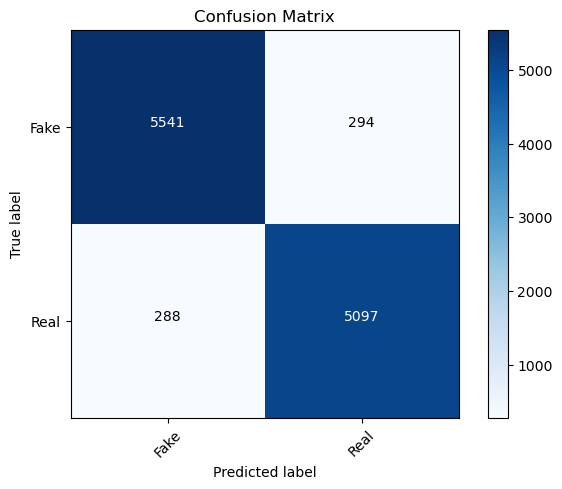

In [41]:
# Confusion Matrix for Naive Bayes

confusion_matrix = metrics.confusion_matrix(y_test, pred_nb)
generate_confusion_matrix(confusion_matrix, classes=['Fake', 'Real'])

In [42]:
NaiveBayes.score(xv_test, y_test)

0.9481283422459893

In [43]:
print (classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5835
           1       0.95      0.95      0.95      5385

    accuracy                           0.95     11220
   macro avg       0.95      0.95      0.95     11220
weighted avg       0.95      0.95      0.95     11220



In [44]:
model_perf_dict['Naive Bayes'] = round(accuracy_score(y_test, pred_nb) * 100, 2)

In [ ]:
from sklearn.svm import SVC

SVMClassifier = SVC(kernel='linear')
SVMClassifier.fit(xv_train, y_train)
pred_svm = SVMClassifier.predict(xv_test)

In [ ]:
# Confusion Matrix for SVM

confusion_matrix = metrics.confusion_matrix(y_test, pred_svm)
generate_confusion_matrix(confusion_matrix, classes=['Fake', 'Real'])

In [ ]:
SVMClassifier.score(xv_test, y_test)

In [ ]:
print (classification_report(y_test, pred_svm))

In [ ]:
model_perf_dict['SVM'] = round(accuracy_score(y_test, pred_svm) * 100, 2)

## Decision Tree Classifier

In [90]:
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifier = DecisionTreeClassifier()
DecisionTreeClassifier.fit(xv_train, y_train)

DecisionTreeClassifier()

In [91]:
pred_dt = DecisionTreeClassifier.predict(xv_test)

Confusion Matrix - without Normalization


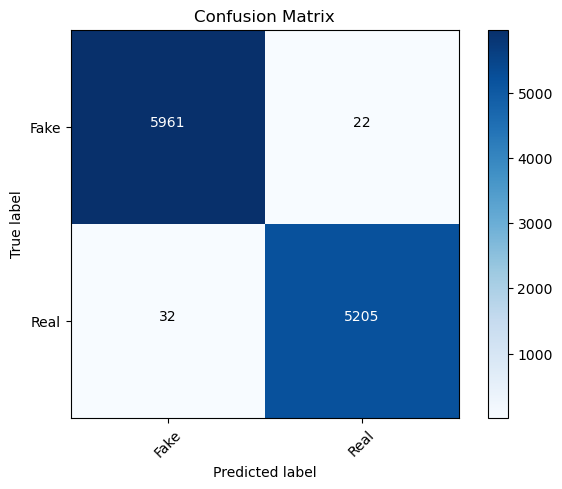

In [92]:
# Confusion Matrix for Decision Tree

confusion_matrix = metrics.confusion_matrix(y_test, pred_dt)
generate_confusion_matrix(confusion_matrix, classes=['Fake', 'Real'])

In [93]:
DecisionTreeClassifier.score(xv_test, y_test)

0.9951871657754011

In [94]:
print (classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5983
           1       1.00      0.99      0.99      5237

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [95]:
model_perf_dict['Decision Tree'] = round(accuracy_score(y_test, pred_dt) * 100, 2)

## Random Forest Classifier

In [96]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier = RandomForestClassifier(random_state = 0)
RandomForestClassifier.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [97]:
pred_rf = RandomForestClassifier.predict(xv_test)

Confusion Matrix - without Normalization


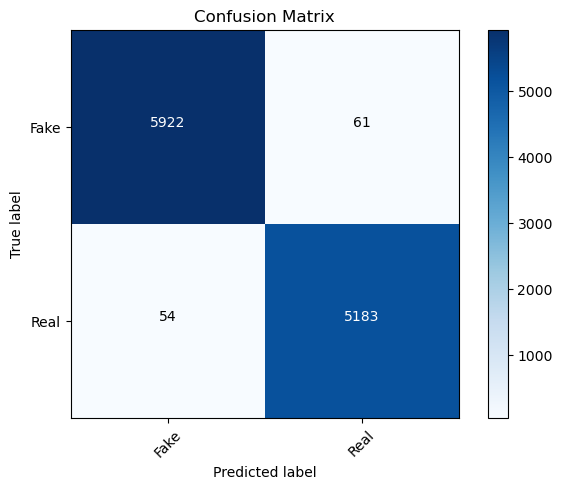

In [98]:
# Confusion Matrix for Random Forest 

confusion_matrix = metrics.confusion_matrix(y_test, pred_rf)
generate_confusion_matrix(confusion_matrix, classes=['Fake', 'Real'])

In [99]:
RandomForestClassifier.score(xv_test, y_test)

0.9897504456327986

In [100]:
print (classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5983
           1       0.99      0.99      0.99      5237

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [101]:
model_perf_dict['Random Forest'] = round(accuracy_score(y_test, pred_rf) * 100, 2)

([<matplotlib.axis.YTick at 0x31d9175d0>,
 [Text(0, 91, '91'),
  Text(0, 92, '92'),
  Text(0, 93, '93'),
  Text(0, 94, '94'),
  Text(0, 95, '95'),
  Text(0, 96, '96'),
  Text(0, 97, '97'),
  Text(0, 98, '98'),
  Text(0, 99, '99'),
  Text(0, 100, '100')])

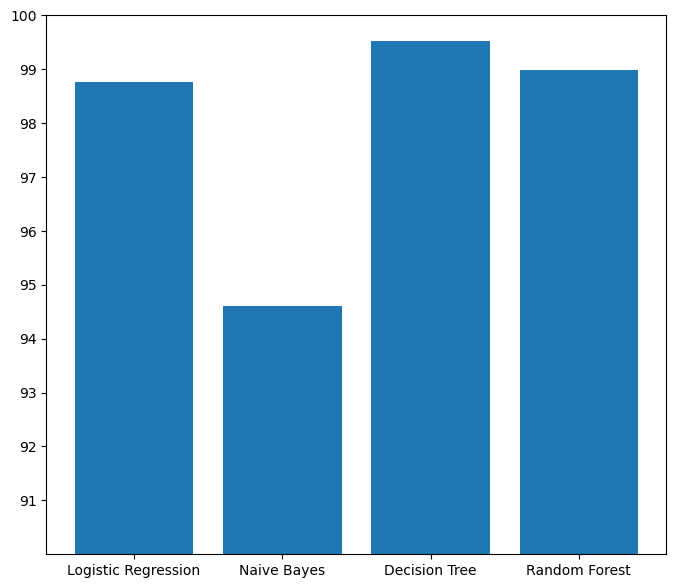

In [102]:
# Visualization of model performance

import matplotlib.pyplot as plt

plt.figure(figsize=(8,7))
plt.bar(list(model_perf_dict.keys()),list(model_perf_dict.values()))
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))

## Testing the Model

In [45]:
def output_lable(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "Real News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test["text"].apply(preprocess_textual_data)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LogisticRegression.predict(new_xv_test)
    pred_NB = NaiveBayes.predict(new_xv_test)
    pred_DT = DecisionTreeClassifier.predict(new_xv_test)
    pred_RF = RandomForestClassifier.predict(new_xv_test)
    pred_SVM = SVMClassifier.predict(new_xv_test)
    
    return print("\n\nSVM Predicition: {} \nLogistic Regression Predicition: {} \nDecision Tree Prediction: {} \nRandom Forrest Classifier Prediction: {} \nNaive Bayes Classifier: {}".format(output_lable(pred_SVM[0]), output_lable(pred_LR[0]), output_lable(pred_DT[0]), output_lable(pred_RF[0]), output_lable(pred_NB[0])))

### Model Testing With Manual Entry

In [46]:
news = str(input()) 
manual_testing(news)

 Hello world


NameError: name 'RF' is not defined

In [62]:
news=str(input())
manual_testing(news)

 'Fully committed' NATO backs new U.S. approach on Afghanistan




LR Predicition: Not A Fake News 
DT Prediction: Fake News 
RFC Prediction:Fake News
